# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Data and Create DataFrame of Means for Each Column/Crop Combo

In [2]:
df = pd.read_csv("../../Data/Crop_Recommendation.csv")
features = ['Nitrogen', 'Phosphorus','Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']
columns = [(feature, 'mean') for feature in features]
means_df = df.groupby("Crop").describe()[columns]
means_df

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
,mean,mean,mean,mean,mean,mean,mean
Crop,,,,,,,
Apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
Banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
Blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
ChickPea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
Coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
Coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
Cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
Grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829


# Sort means data frame by ph level

In [3]:
sorted_df = means_df.sort_values(by=("pH_Value", "mean"))
low_ph = sorted_df[sorted_df[("pH_Value", "mean")] < 6.03]
mid_ph = sorted_df[sorted_df[("pH_Value", "mean")] > 6.03]
mid_ph = mid_ph[mid_ph[("pH_Value","mean")] < 6.7]
mid_high_ph = sorted_df[sorted_df[("pH_Value", "mean")] > 6.7]
high_ph = mid_high_ph[sorted_df[("pH_Value", "mean")] > 6.9]
mid_high_ph = mid_high_ph[sorted_df[("pH_Value", "mean")] < 6.9]
ph_dfs = [low_ph,mid_ph,mid_high_ph, high_ph]

<ipython-input-3-785098d7f8f4>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_ph = mid_high_ph[sorted_df[("pH_Value", "mean")] > 6.9]
<ipython-input-3-785098d7f8f4>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mid_high_ph = mid_high_ph[sorted_df[("pH_Value", "mean")] < 6.9]


In [4]:
sorted_ph_dfs = []
for ph_df in ph_dfs:
    sorted_ph_dfs.append(ph_df.sort_values(by=("Nitrogen", "mean")))
sorted_ph_dfs

[            Nitrogen Phosphorus Potassium Temperature   Humidity  pH_Value  \
                 mean       mean      mean        mean       mean      mean   
 Crop                                                                         
 Mango          20.07      27.18     29.92   31.208770  50.156573  5.766373   
 PigeonPeas     20.73      67.73     20.29   27.741762  48.061633  5.794175   
 KidneyBeans    20.75      67.54     20.05   20.115085  21.605357  5.749411   
 Apple          20.80     134.22    199.89   22.630942  92.333383  5.929663   
 Coconut        21.98      16.93     30.59   27.409892  94.844272  5.976562   
 Grapes         23.18     132.53    200.11   23.849575  81.875228  6.025937   
 Banana        100.23      82.01     50.05   27.376798  80.358123  5.983893   
 
                Rainfall  
                    mean  
 Crop                     
 Mango         94.704515  
 PigeonPeas   149.457564  
 KidneyBeans  105.919778  
 Apple        112.654779  
 Coconut      175.6

# Perform Clustering on Means Data Frame

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=11).fit_predict(means_df)
clusters = {}
for i in range(len(kmeans)):
    if kmeans[i] not in clusters:
        clusters[kmeans[i]] = [means_df.index[i]]
    else:
        clusters[kmeans[i]].append(means_df.index[i])
clusters

C:\Users\dclutterbuck\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


{2: ['Apple', 'Grapes'],
 9: ['Banana'],
 0: ['Blackgram', 'Lentil', 'MothBeans', 'MungBean'],
 10: ['ChickPea'],
 8: ['Coconut', 'Papaya'],
 5: ['Coffee', 'Jute'],
 3: ['Cotton', 'Maize'],
 6: ['KidneyBeans', 'PigeonPeas'],
 4: ['Mango', 'Orange', 'Pomegranate'],
 7: ['Muskmelon', 'Watermelon'],
 1: ['Rice']}

In [6]:

means_df[[idx in clusters[8] for idx in means_df.index]]

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
,mean,mean,mean,mean,mean,mean,mean
Crop,,,,,,,
Coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
Papaya,49.88,59.05,50.04,33.723859,92.403388,6.741442,142.627839


In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=13).fit_predict(means_df)
clusters = {}
for i in range(len(kmeans)):
    if kmeans[i] not in clusters:
        clusters[kmeans[i]] = [means_df.index[i]]
    else:
        clusters[kmeans[i]].append(means_df.index[i])
clusters

C:\Users\dclutterbuck\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


{1: ['Apple', 'Grapes'],
 12: ['Banana'],
 2: ['Blackgram', 'Lentil', 'MothBeans', 'MungBean'],
 7: ['ChickPea'],
 10: ['Coconut'],
 6: ['Coffee', 'Jute'],
 5: ['Cotton', 'Maize'],
 9: ['KidneyBeans', 'PigeonPeas'],
 11: ['Mango'],
 3: ['Muskmelon', 'Watermelon'],
 4: ['Orange', 'Pomegranate'],
 0: ['Papaya'],
 8: ['Rice']}

In [8]:
means_df

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
,mean,mean,mean,mean,mean,mean,mean
Crop,,,,,,,
Apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
Banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
Blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
ChickPea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
Coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
Coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
Cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
Grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829


# Show Silhouette plots for clustering by means

C:\Users\dclutterbuck\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\dclutterbuck\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\dclutterbuck\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\dclutterbuck\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are

{2: ['Apple', 'Grapes'], 0: ['Banana', 'Cotton', 'Maize', 'Muskmelon', 'Watermelon'], 3: ['Blackgram', 'Lentil', 'Mango', 'MothBeans', 'MungBean'], 4: ['ChickPea', 'KidneyBeans', 'PigeonPeas'], 1: ['Coconut', 'Orange', 'Papaya', 'Pomegranate'], 5: ['Coffee', 'Jute', 'Rice']}


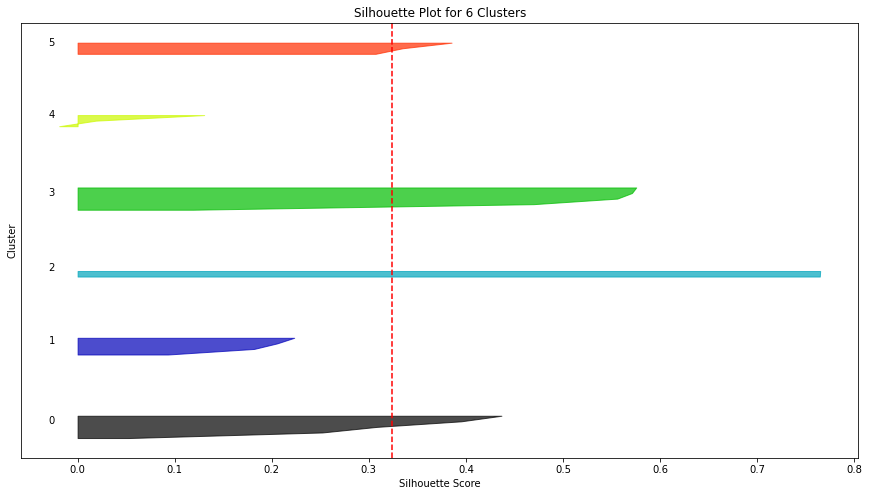

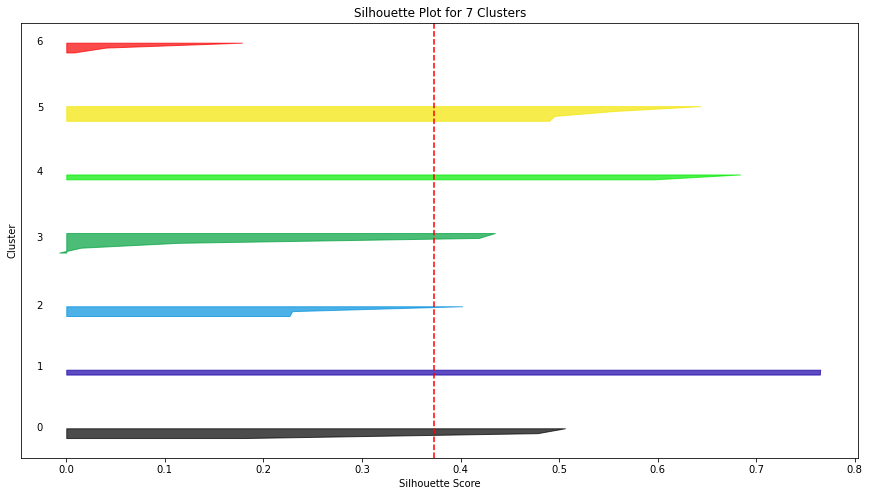

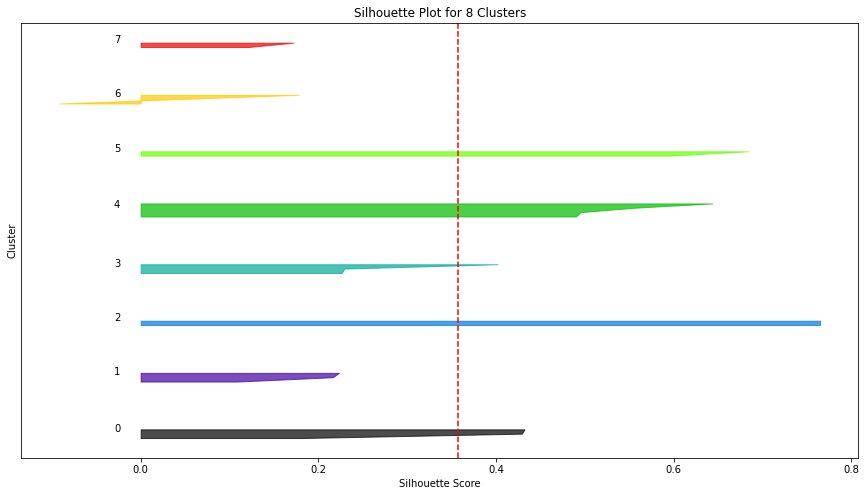

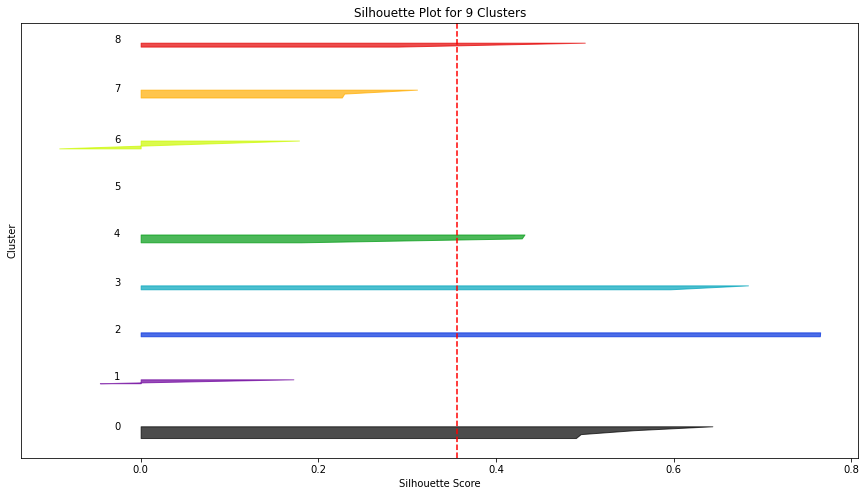

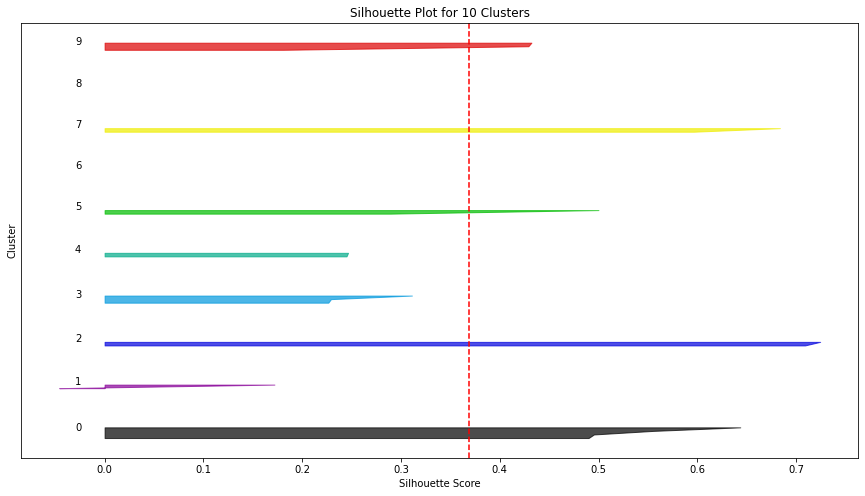

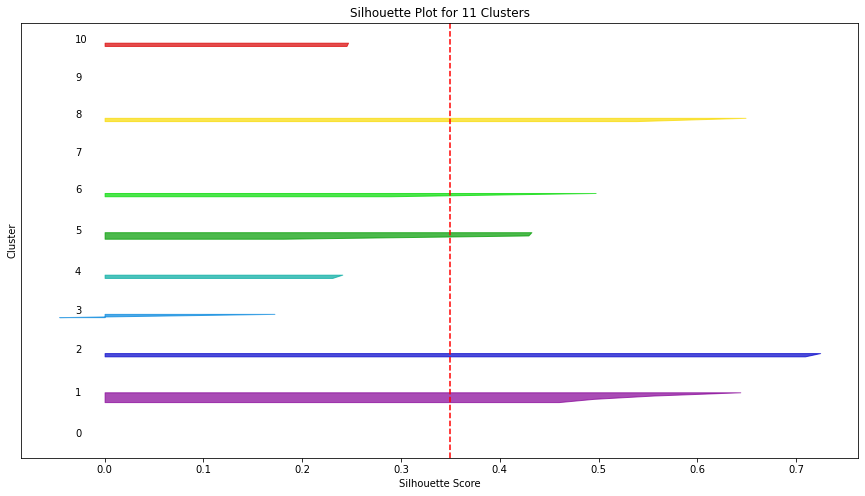

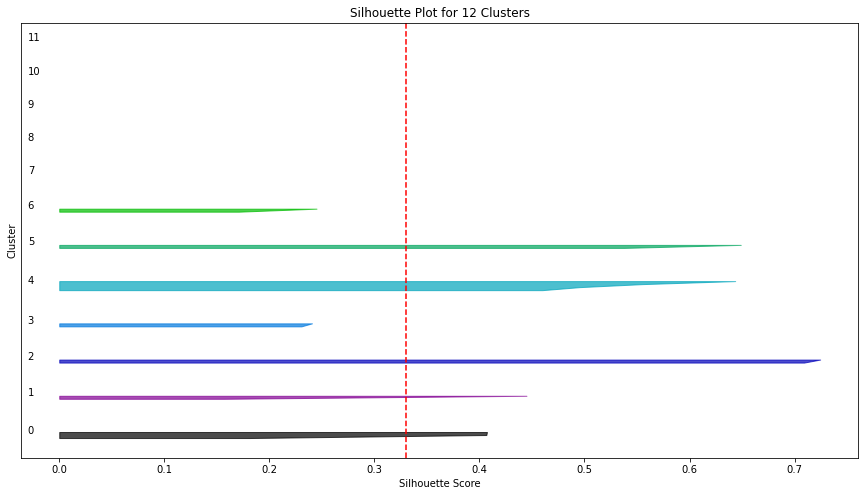

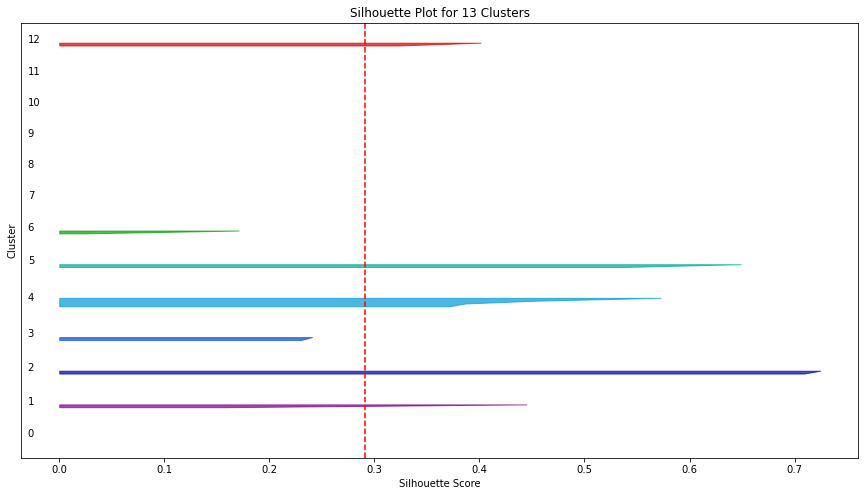

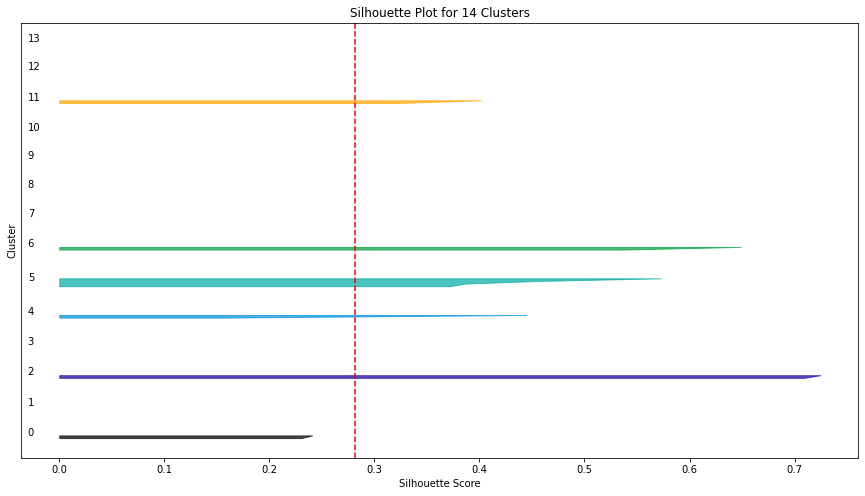

In [9]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
count = 0
X = means_df.reset_index()
X.drop(["Crop"], axis=1, inplace=True)
cs = []
for k in np.arange(6,15):
    
    fig, ax = plt.subplots(figsize=(15,8))
    
    c = KMeans(n_clusters=k, random_state=0).fit_predict(X)
    cs.append(c)
    silhouette_avg = silhouette_score(X, c)
    sample_silhouette_values = silhouette_samples(X, c)
    y_lower=10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[c == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
        
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_xlabel('Silhouette Score')
    ax.set_ylabel('Cluster')
    ax.set_title('Silhouette Plot for ' + str(k) + ' Clusters')
    
    ax.set_yticks([])
    
    count += 1
clusters = {}
c0 = cs[0]
for i in range(len(c0)):
    if c0[i] not in clusters:
        clusters[c0[i]] = [means_df.index[i]]
    else:
        clusters[c0[i]].append(means_df.index[i])
print(clusters)

In [10]:
df

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


# Scale the input data and drop Crop column for clustering

In [11]:
from sklearn.preprocessing import MinMaxScaler
y = df['Crop']
X = df.drop(columns = ['Crop'], axis = 1)
scaler = MinMaxScaler()
X_transformed = scaler.fit_transform(X)


# Cluster with 8 clusters on scaled X data and get count for observations of each crop in each cluster

In [12]:
kmeans = KMeans(n_clusters=8, random_state = 0).fit_predict(X_transformed)
df_kmeans = df.copy()
df_kmeans["Cluster"] = kmeans
clusters = {}
for index, row in df_kmeans.iterrows():

    if row.Cluster not in clusters:
        clusters[row.Cluster] = {row.Crop: 1}
    else:
        cluster = clusters[row.Cluster]
        if row.Crop in cluster:
            cluster[row.Crop] += 1
        else:
            cluster[row.Crop] = 1


# Create final clustering by adding crop to cluster if at least half of its observations are in that cluster

In [13]:
final_clusters = {}
for cluster in clusters:
    final_clusters[cluster] = []
    for crop in clusters[cluster]:
        if clusters[cluster][crop] > 50:
            final_clusters[cluster].append(crop)
print(final_clusters)
print(clusters)

{4: ['Rice', 'Papaya', 'Jute'], 6: ['Maize', 'Banana', 'Cotton', 'Coffee'], 7: ['MothBeans', 'MungBean', 'Blackgram', 'Lentil'], 5: ['ChickPea', 'KidneyBeans'], 0: ['PigeonPeas', 'Mango'], 3: ['Pomegranate', 'Orange', 'Coconut'], 1: ['Grapes', 'Apple'], 2: ['Watermelon', 'Muskmelon']}
{4: {'Rice': 100, 'PigeonPeas': 1, 'Papaya': 56, 'Jute': 96, 'Coffee': 34}, 6: {'Maize': 99, 'Banana': 100, 'Papaya': 4, 'Cotton': 100, 'Jute': 4, 'Coffee': 66}, 7: {'Maize': 1, 'PigeonPeas': 1, 'MothBeans': 53, 'MungBean': 100, 'Blackgram': 100, 'Lentil': 100, 'Papaya': 37}, 5: {'ChickPea': 100, 'KidneyBeans': 100, 'PigeonPeas': 8}, 0: {'PigeonPeas': 90, 'MothBeans': 47, 'Mango': 100}, 3: {'Pomegranate': 100, 'Orange': 100, 'Papaya': 2, 'Coconut': 100}, 1: {'Grapes': 100, 'Apple': 100}, 2: {'Watermelon': 100, 'Muskmelon': 100, 'Papaya': 1}}


# Create silhouette plots for various number of clusters on all observations

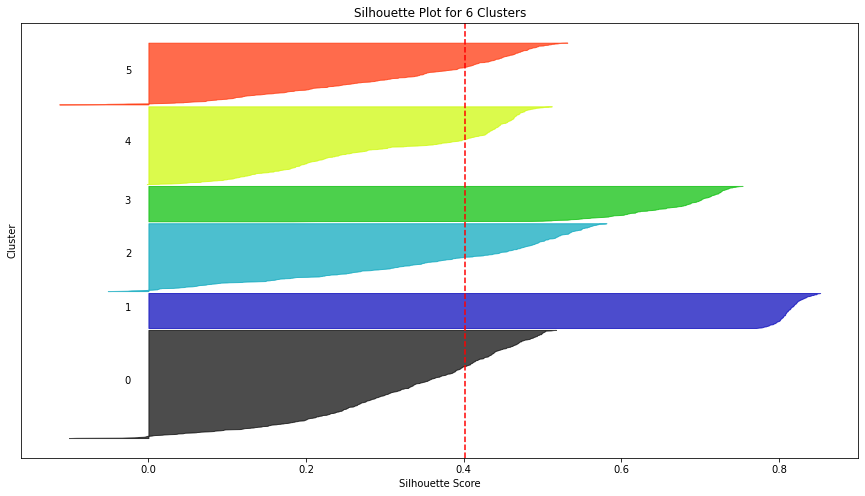

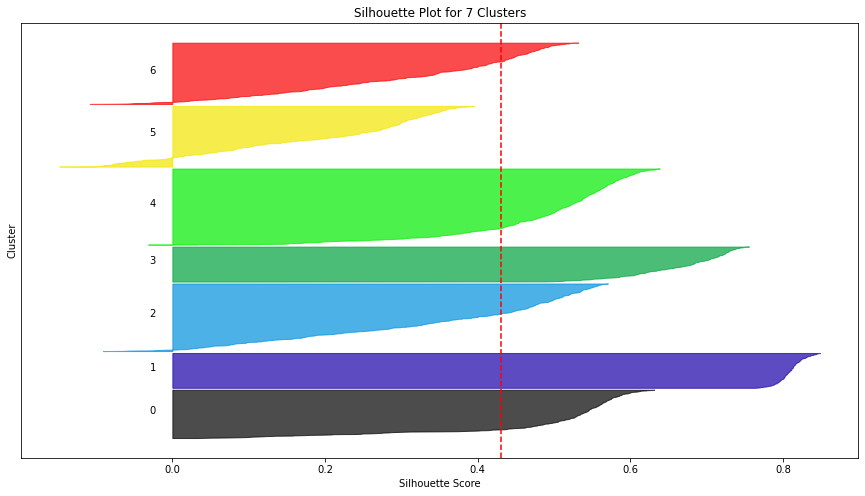

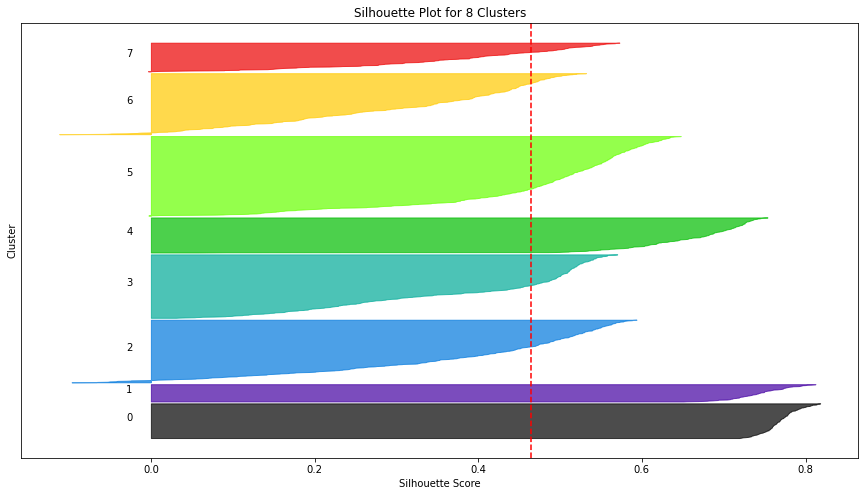

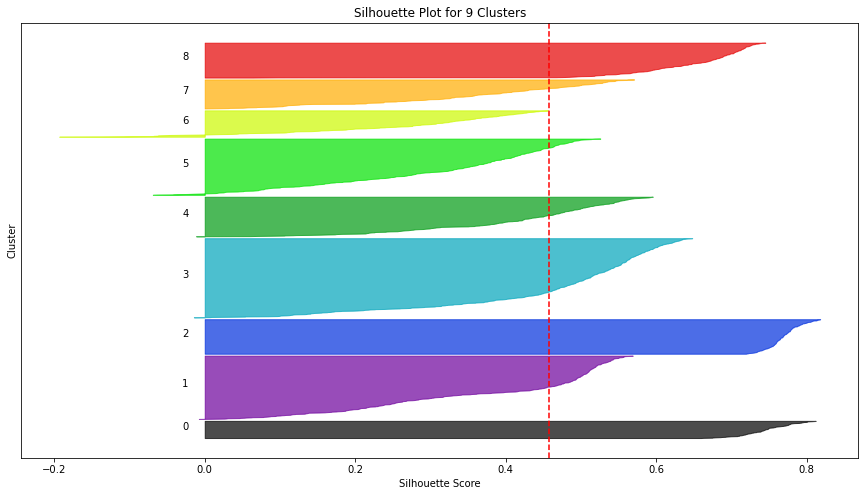

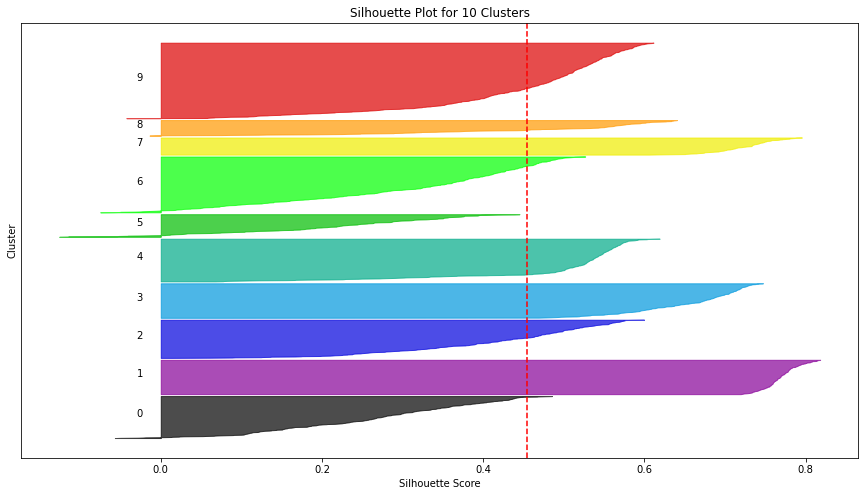

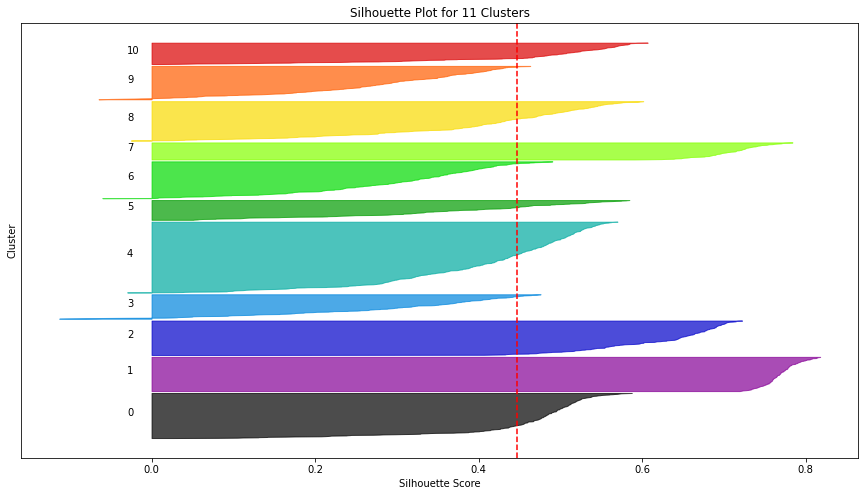

In [14]:
import numpy as np
count = 0
for k in np.arange(6,12):
    
    fig, ax = plt.subplots(figsize=(15,8))
    
    c = KMeans(n_clusters=k, random_state=0).fit_predict(X)
    silhouette_avg = silhouette_score(X, c)
    sample_silhouette_values = silhouette_samples(X, c)
    
    y_lower=10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[c == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
        
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_xlabel('Silhouette Score')
    ax.set_ylabel('Cluster')
    ax.set_title('Silhouette Plot for ' + str(k) + ' Clusters')
    
    ax.set_yticks([])
    
    count += 1

# Create elbow plot for various numbers of clusters

Text(0.5, 1.0, 'Elbow Plot')

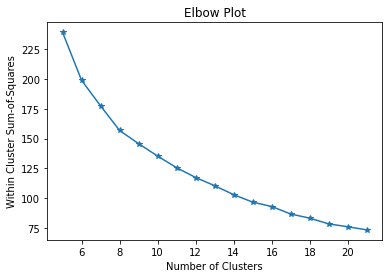

In [15]:
W = []
cluster_range = list(range(5,22))

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_transformed)
    W.append(kmeans.inertia_)
    
fig, ax = plt.subplots()
ax.plot(cluster_range, W, '-*')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Within Cluster Sum-of-Squares')
ax.set_title('Elbow Plot')

# Confusion matrix for logreg on unclustered data

C:\Users\dclutterbuck\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


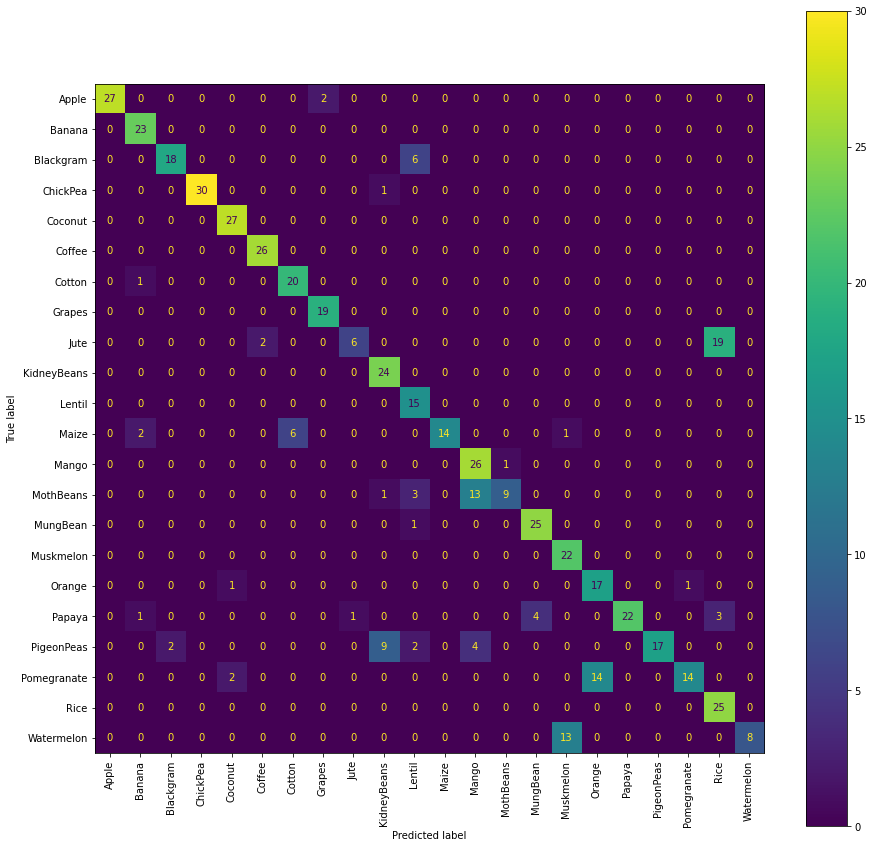

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)
logreg_f = LogisticRegression(multi_class='multinomial', C=0.01, random_state=42)
logreg_f.fit(X_train_sc, y_train)

fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(estimator=logreg_f,
                     X=X_test_sc,
                     y_true=y_test,
                     ax = ax,
                     xticks_rotation='vertical')

# save clusters to csv

In [17]:
print(final_clusters)
df_clusters = df.copy()
clusters = []
for idx, row in df_clusters.iterrows():
    for cluster in final_clusters.values():
        if row.Crop in cluster:
            cluster_name = ""
            for crop in cluster:
                cluster_name += crop + "_"
            clusters.append(cluster_name[:-1])
            continue
df_clusters = pd.concat([df_clusters, pd.DataFrame(clusters,columns=["Crop_Cluster"])], axis = 1)
df_clusters.drop("Crop", axis=1, inplace=True)
df_clusters.to_csv("../../Data/Crop_Recommendation_with_clusters.csv")

{4: ['Rice', 'Papaya', 'Jute'], 6: ['Maize', 'Banana', 'Cotton', 'Coffee'], 7: ['MothBeans', 'MungBean', 'Blackgram', 'Lentil'], 5: ['ChickPea', 'KidneyBeans'], 0: ['PigeonPeas', 'Mango'], 3: ['Pomegranate', 'Orange', 'Coconut'], 1: ['Grapes', 'Apple'], 2: ['Watermelon', 'Muskmelon']}


# Confusion matrix and accuracy for basic logreg on clustered crops

C:\Users\dclutterbuck\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.9163636363636364

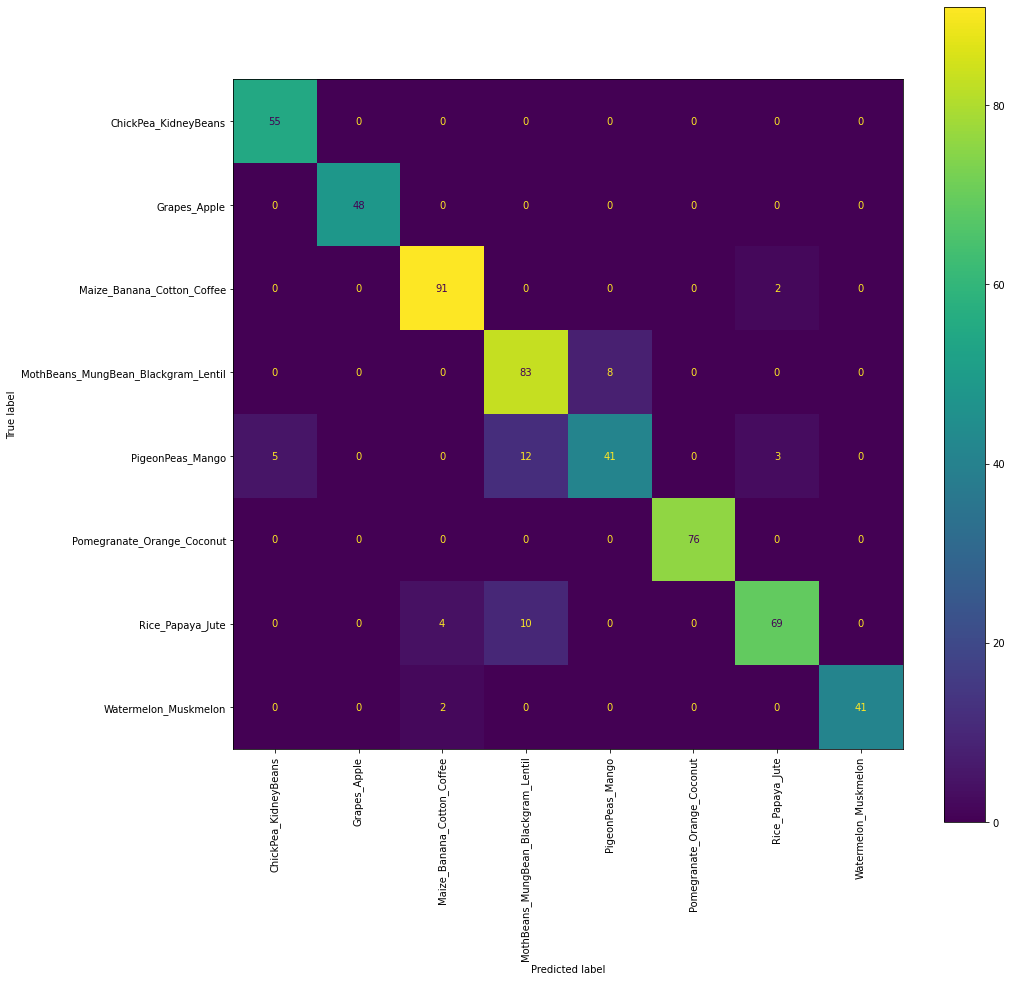

In [18]:
X = df_clusters.drop("Crop_Cluster", axis=1)
y = df_clusters["Crop_Cluster"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)
logreg_f = LogisticRegression(multi_class='multinomial', C=0.01, random_state=42)
logreg_f.fit(X_train_sc, y_train)

fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(estimator=logreg_f,
                     X=X_test_sc,
                     y_true=y_test,
                     ax = ax,
                     xticks_rotation='vertical')
logreg_f.score(X_test_sc, y_test)